Valeur du pixel le plus lumineux : 255
Position (ligne, colonne) : (array([534, 548]), array([466, 649]))
Feu ORANGE allumé


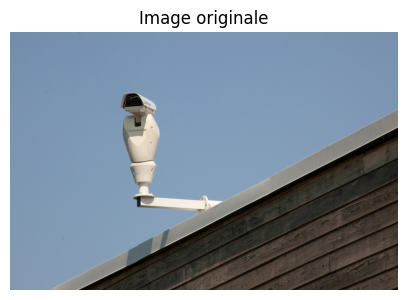

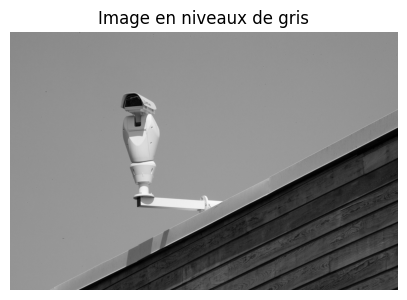

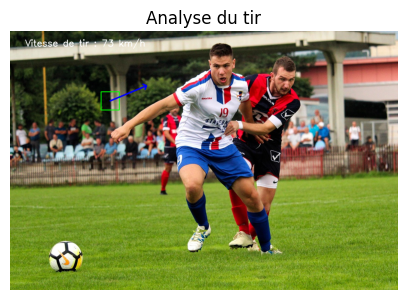

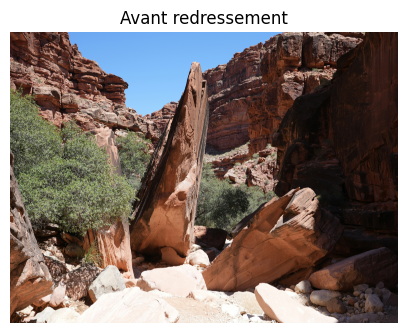

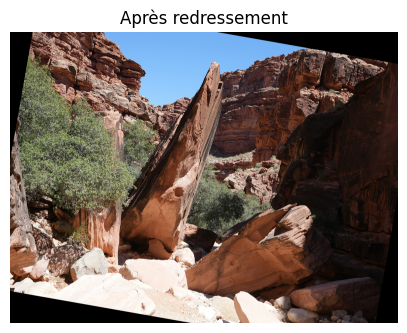

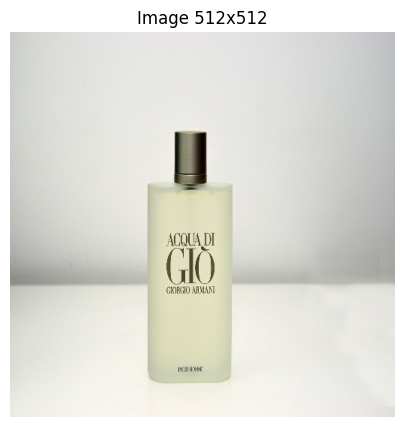

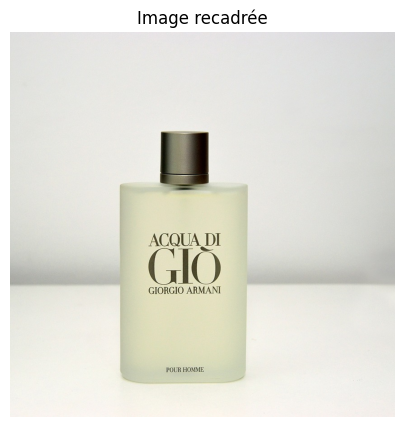

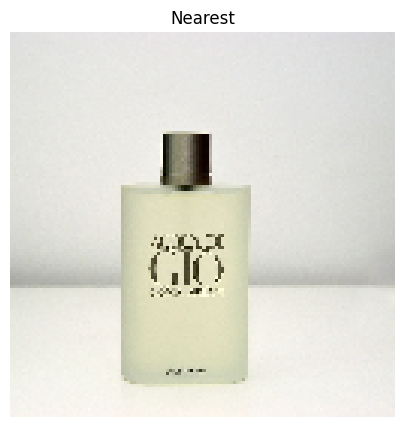

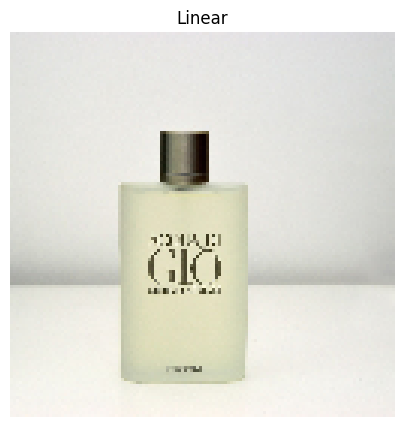

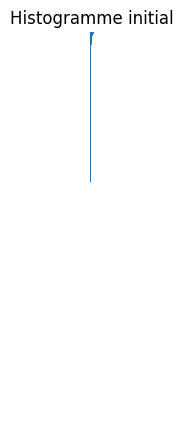

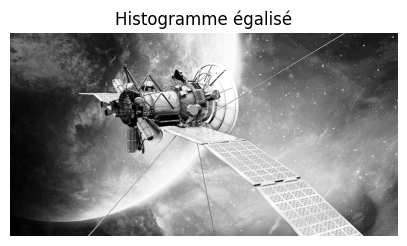

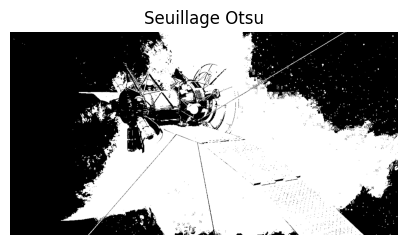

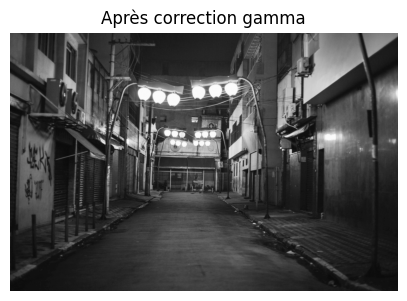

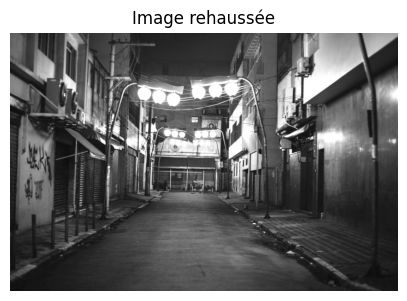

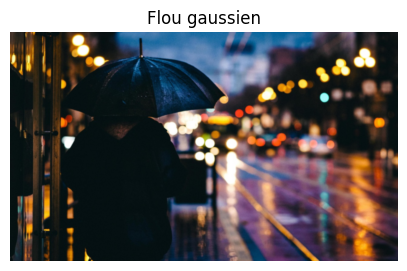

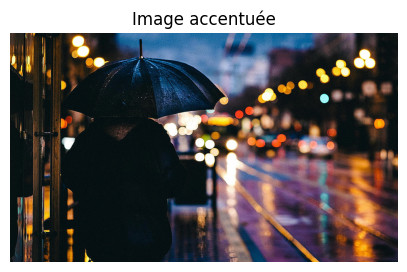

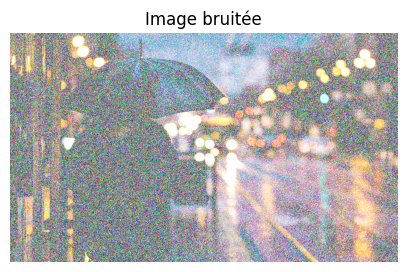

In [6]:

# Import des bibliothèques nécessaires

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour afficher correctement les images
# OpenCV utilise BGR, matplotlib utilise RGB
def afficher(img, titre="Image", gris=False):
    plt.figure(figsize=(5,5))
    if gris:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titre)
    plt.axis('off')


## 1- Conversion en niveaux de gris


# Chargement de l'image de la caméra
img = cv2.imread('images/camera.jpg')

# Conversion de l'image couleur en niveaux de gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Affichage des deux images pour comparaison
afficher(img, 'Image originale')
afficher(gris, 'Image en niveaux de gris', gris=True)

### Recherche du pixel le plus lumineux

# Valeur maximale des pixels
valeur_max = gris.max()

# Position du pixel le plus lumineux
position = np.where(gris == valeur_max)

print("Valeur du pixel le plus lumineux :", valeur_max)
print("Position (ligne, colonne) :", position)

## 2- Espaces de couleurs – HSV (feu tricolore)

# Chargement de l'image du feu tricolore
img = cv2.imread('images/traffic_light.jpg')

# Conversion de BGR vers HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

### Création des masques de couleur
# Masque ROUGE
bas_rouge = np.array([0, 120, 70])
haut_rouge = np.array([10, 255, 255])
masque_rouge = cv2.inRange(hsv, bas_rouge, haut_rouge)

# Masque ORANGE
bas_orange = np.array([10, 100, 100])
haut_orange = np.array([25, 255, 255])
masque_orange = cv2.inRange(hsv, bas_orange, haut_orange)

# Masque VERT
bas_vert = np.array([40, 70, 70])
haut_vert = np.array([80, 255, 255])
masque_vert = cv2.inRange(hsv, bas_vert, haut_vert)

### Détection automatique de la lumière allumée

if masque_rouge.sum() > masque_orange.sum() and masque_rouge.sum() > masque_vert.sum():
    print("Feu ROUGE allumé")
elif masque_orange.sum() > masque_vert.sum():
    print("Feu ORANGE allumé")
else:
    print("Feu VERT allumé")

## 3- Dessin sur une image (match de football)

# Chargement de l'image du match
img = cv2.imread('images/football.jpg')

# Dessin d'un rectangle autour du ballon
cv2.rectangle(img, (300,200), (360,260), (0,255,0), 2)

# Dessin d'une flèche indiquant la direction du tir
cv2.arrowedLine(img, (330,230), (450,180), (255,0,0), 3)

# Ajout du texte de vitesse du tir
cv2.putText(img, 'Vitesse de tir : 73 km/h', (50,50),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

# Affichage final
afficher(img, 'Analyse du tir')

## 4- Transformation géométrique – Rotation

# Chargement de l'image inclinée
img = cv2.imread('images/tilted.jpg')

# Angle estimé manuellement (image penchée)
angle = -10

# Récupération des dimensions

h, w = img.shape[:2]
centre = (w//2, h//2)

# Matrice de rotation
M = cv2.getRotationMatrix2D(centre, angle, 1.0)

# Application de la rotation
img_redressee = cv2.warpAffine(img, M, (w, h))

# Comparaison avant / après
afficher(img, 'Avant redressement')
afficher(img_redressee, 'Après redressement')

## 5- Redimensionnement, recadrage et miniature

# Chargement de l'image du produit
img = cv2.imread('images/product.jpg')

### Redimensionnement en 512x512

img_512 = cv2.resize(img, (512,512))
afficher(img_512, 'Image 512x512')

### Recadrage centré

h, w = img.shape[:2]
taille = min(h, w)

img_cadree = img[h//2-taille//2:h//2+taille//2,
                 w//2-taille//2:w//2+taille//2]

afficher(img_cadree, 'Image recadrée')

### Création des miniatures (128x128)

mini_nearest = cv2.resize(img_cadree, (128,128), interpolation=cv2.INTER_NEAREST)
mini_linear = cv2.resize(img_cadree, (128,128), interpolation=cv2.INTER_LINEAR)
mini_cubic = cv2.resize(img_cadree, (128,128), interpolation=cv2.INTER_CUBIC)

afficher(mini_nearest, 'Nearest')
afficher(mini_linear, 'Linear')
afficher(mini_cubic, 'Cubic')


## 6- Histogramme, égalisation et seuillage automatique

# Chargement de l'image satellite en niveaux de gris
img = cv2.imread('images/satellite.jpg', 0)

### Histogramme initial

plt.hist(img.ravel(), 256)
plt.title('Histogramme initial')
plt.show()

### Égalisation de l'histogramme

img_eq = cv2.equalizeHist(img)
afficher(img_eq, 'Histogramme égalisé', gris=True)

### Seuillage automatique (Otsu)

_, img_seuil = cv2.threshold(img_eq, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)

afficher(img_seuil, 'Seuillage Otsu', gris=True)


## 7- Rehaussement d'image (photo de nuit)

# Chargement de l'image nocturne
img = cv2.imread('images/night.jpg', 0)

### Correction gamma

gamma = 1.6
img_gamma = np.power(img/255.0, 1/gamma)
img_gamma = (img_gamma*255).astype(np.uint8)

afficher(img_gamma, 'Après correction gamma', gris=True)

### Augmentation du contraste

img_contraste = cv2.convertScaleAbs(img_gamma, alpha=1.2, beta=10)

afficher(img_contraste, 'Image rehaussée', gris=True)

## 8- Flou, netteté et bruit

# Chargement de l'image légèrement floue
img = cv2.imread('images/blurred.jpg')

### Flou gaussien

img_floue = cv2.GaussianBlur(img, (5,5), 0)
afficher(img_floue, 'Flou gaussien')

### Filtre de netteté

noyau = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
img_nette = cv2.filter2D(img, -1, noyau)
afficher(img_nette, 'Image accentuée')

### Ajout d'un bruit artificiel

bruit = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_bruitee = cv2.add(img, bruit)

afficher(img_bruitee, 'Image bruitée')
